<a href="https://colab.research.google.com/github/Nithya9404/Deep_Learning/blob/main/Deep_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

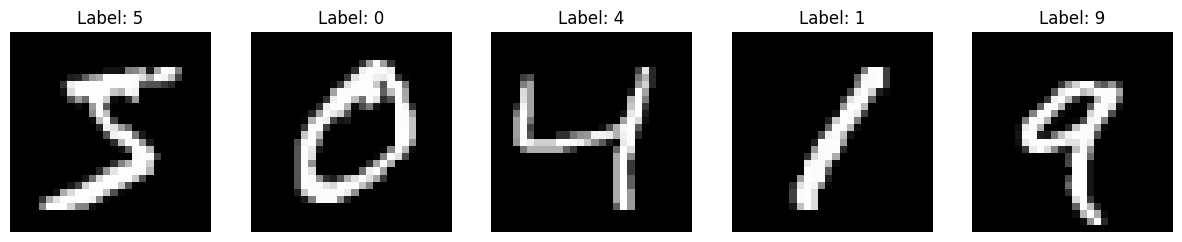

In [ ]:
import matplotlib.pyplot as plt

# Visualize some of the train images
num_samples_to_visualize = 5
plt.figure(figsize=(15, 3))
for i in range(num_samples_to_visualize):
    plt.subplot(1, num_samples_to_visualize, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 55s 66ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0333 - val_accuracy: 0.9922
Epoch 2/15
844/844 [==============================] - 53s 63ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0382 - val_accuracy: 0.9917
Epoch 3/15
844/844 [==============================] - 53s 62ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0384 - val_accuracy: 0.9918
Epoch 4/15
844/844 [==============================] - 53s 63ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0327 - val_accuracy: 0.9930
Epoch 5/15
844/844 [==============================] - 53s 63ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0339 - val_accuracy: 0.9922
Epoch 6/15
844/844 [==============================] - 54s 64ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0372 - val_accuracy: 0.9923
Epoch 7/15
844/844 [==============================] - 55s 65ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0372 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 5s 15ms/step - loss: 0.0327 - accuracy: 0.9929
Test accuracy: 0.992900013923645


1/1 [==============================] - 0s 24ms/step


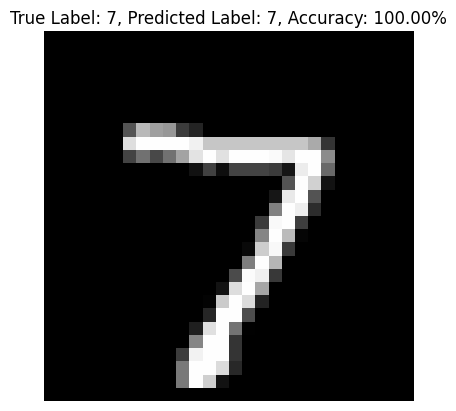

In [ ]:
# Choose an index from the test set
import matplotlib.pyplot as plt

index = 0

# Get the image and its label
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Calculate accuracy for this individual image
accuracy = 100 * (predicted_label == true_label)

# Display the test image
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}, Accuracy: {accuracy:.2f}%")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/datasets/test')


1/1 [==============================] - 0s 26ms/step


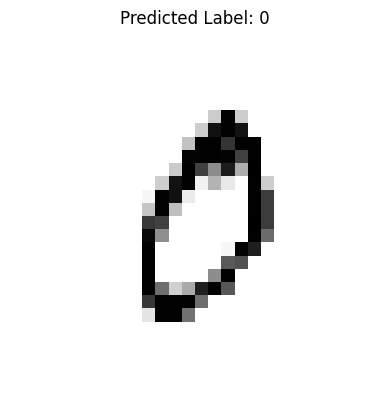

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image
uploaded_image = cv2.imread('/content/image.png', cv2.IMREAD_GRAYSCALE)
uploaded_image = cv2.resize(uploaded_image, (28, 28))
uploaded_image = uploaded_image.astype('float32') / 255.0

# Expand dimensions to match batch size and channels
test_image = np.expand_dims(uploaded_image, axis=0)
test_image = np.expand_dims(test_image, axis=-1)

# Predict using the model
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the image and prediction
plt.imshow(uploaded_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 28ms/step


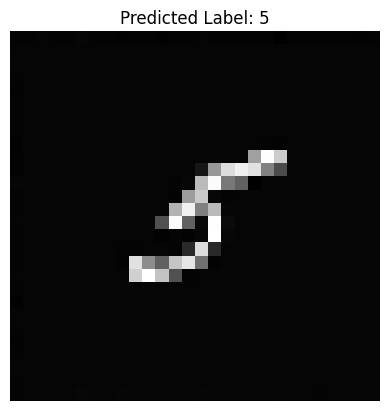

In [ ]:
uploaded_image = cv2.imread('/content/image2.png', cv2.IMREAD_GRAYSCALE)
uploaded_image = cv2.resize(uploaded_image, (28, 28))
uploaded_image = uploaded_image.astype('float32') / 255.0

# Expand dimensions to match batch size and channels
test_image = np.expand_dims(uploaded_image, axis=0)
test_image = np.expand_dims(test_image, axis=-1)

# Predict using the model
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the image and prediction
plt.imshow(uploaded_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()